In [6]:

import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OrdinalEncoder

In [2]:
%%capture

%pip install seaborn matplotlib pandas

### Data ingestion, PDA


In [7]:
url="https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

df= pd.read_csv(url)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [8]:
df.shape

(614, 13)

In [9]:
df2=df.copy()
df2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
number_figs= df2.select_dtypes(include=['float64', 'int64']).columns
number_figs

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [11]:
number_figs= df2.select_dtypes(include=['float64', 'int64']).columns
number_figs

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
df2[number_figs].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Data Cleaning

In [15]:
df2.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df2.duplicated().sum()

np.int64(0)

In [17]:
df2['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [12]:
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace= True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\178542802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Gender'].fillna(df2['Gender'].mode()[0], inplace= True)


In [13]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### let's fill for Others too, Married column, dependents etc

In [15]:
df2['Married'].isna().sum()

np.int64(3)

In [16]:
df2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df2.shape

(614, 13)

In [23]:
total_rows= 614

missing_data= df2.isna().sum()

Table= missing_data / total_rows * 100

missing_dat= pd.DataFrame({'Missing': missing_data, 'percent': Table.round(1)})

print(missing_dat)



                   Missing  percent
Loan_ID                  0      0.0
Gender                  13      2.1
Married                  3      0.5
Dependents              15      2.4
Education                0      0.0
Self_Employed           32      5.2
ApplicantIncome          0      0.0
CoapplicantIncome        0      0.0
LoanAmount              22      3.6
Loan_Amount_Term        14      2.3
Credit_History          50      8.1
Property_Area            0      0.0
Loan_Status              0      0.0


In [17]:
object_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']

In [ ]:
total_rows=

In [ ]:
for col in object_columns:
    df2[col].fillna(df2[col].mode()[0], inplace= True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\3286945013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mode()[0], inplace= True)


In [19]:
for col in numerical_columns:
    df2[col].fillna(df2[col].median(), inplace = True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\3761262007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace = True)
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\3761262007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [20]:
needed= [ 'Gender', 'Married', 'Property_Area']

for col in needed:
    if col in needed:
        df2[col]= df2[col].str.strip()

In [21]:
number_figs= df2.select_dtypes(include=['float64', 'int64']).columns
number_figs

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [22]:
for c in df2.select_dtypes('object').columns:
    df2[c] = df2[c].astype(str).str.strip().replace({'nan': np.nan})

In [23]:
for c in df2.select_dtypes('object').columns:
    df2[c] = df2[c].astype(str).str.strip().replace({'nan': np.nan})

In [24]:
for c in df2.select_dtypes(include=['float64', 'int64']).columns:
        df2[c] = pd.to_numeric(df2[c], errors = 'coerce')

In [25]:
for c in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if c in df2.columns:
        df2[c] = pd.to_numeric(df2[c], errors = 'coerce')

In [26]:
for c in number_figs:
        df2[c] = pd.to_numeric(df2[c], errors = 'coerce')

In [27]:
df2.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [28]:
df2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### EDA


In [29]:
# Checking for Outliers for applicant income

Q1 = df2['ApplicantIncome'].quantile(0.25)
Q2 = df2['ApplicantIncome'].quantile(0.50)
Q3 = df2['ApplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)


mask_outliers = (df2['ApplicantIncome'] > upper_bound) | (df2['ApplicantIncome'] < lower_bound).sum()
print("Total Numbers of outlier is", mask_outliers.sum())


Q1: 2877.5

Q2: 3812.5

Q3: 5795.0
IQR: 2917.5
lower bound : -1498.75

Upper bound : 10171.25
Total Numbers of outlier is 50


In [36]:
#  Checking for Outliers for loan Amount
for col in df3.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df3[col].quantile(0.25)
    Q2 = df3[col].quantile(0.50)
    Q3 = df3[col].quantile(0.75)

    print(f"\nFor {col}")
    print("\Q1:",Q1)
    print("Q2:",Q2)
    print("Q3:",Q3)
    IQR = Q3 - Q1
    print("IQR:",IQR)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    print("lower bound :",lower_bound)
    print("Upper bound :",upper_bound)
    mask_outliers = (df3['LoanAmount'] > upper_bound) | (df3['LoanAmount'] < lower_bound).sum()
    print("Total Number of Outlier is", mask_outliers.sum())



For ApplicantIncome
\Q1: 2877.5
Q2: 3812.5
Q3: 5795.0
IQR: 2917.5
lower bound : -1498.75
Upper bound : 10171.25
Total Number of Outlier is 0

For CoapplicantIncome
\Q1: 0.0
Q2: 1188.5
Q3: 2297.25
IQR: 2297.25
lower bound : -3445.875
Upper bound : 5743.125
Total Number of Outlier is 0

For LoanAmount
\Q1: 100.0
Q2: 128.0
Q3: 168.0
IQR: 68.0
lower bound : -2.0
Upper bound : 270.0
Total Number of Outlier is 0

For Loan_Amount_Term
\Q1: 360.0
Q2: 360.0
Q3: 360.0
IQR: 0.0
lower bound : 360.0
Upper bound : 360.0
Total Number of Outlier is 614

For Credit_History
\Q1: 1.0
Q2: 1.0
Q3: 1.0
IQR: 0.0
lower bound : 1.0
Upper bound : 1.0
Total Number of Outlier is 592


<>:8: SyntaxWarning: invalid escape sequence '\Q'
<>:8: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_10548\123157930.py:8: SyntaxWarning: invalid escape sequence '\Q'
  print("\Q1:",Q1)


In [31]:
Q1 = df2['LoanAmount'].quantile(0.25)
Q2 = df2['LoanAmount'].quantile(0.50)
Q3 = df2['LoanAmount'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)


Q1: 100.25

Q2: 128.0

Q3: 164.75
IQR: 64.5
lower bound : 3.5

Upper bound : 261.5


In [32]:
Q1 = df2['CoapplicantIncome'].quantile(0.25)
Q2 = df2['CoapplicantIncome'].quantile(0.50)
Q3 = df2['CoapplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)
mask_outliers = (df2['CoapplicantIncome'] > upper_bound) | (df2['CoapplicantIncome'] < lower_bound).sum()
print("Total Number of Outlier is", mask_outliers.sum())


Q1: 0.0

Q2: 1188.5

Q3: 2297.25
IQR: 2297.25
lower bound : -3445.875

Upper bound : 5743.125
Total Number of Outlier is 18


In [28]:
df3=df2.copy()

In [26]:
outlier_col=['ApplicantIncome','LoanAmount','CoapplicantIncome']

In [35]:
### After Ouliers sorted
df3.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df2.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


def outlier_vis (oulier_col):
    for x in outlier_col:       
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df2[x])
        plt.axvline(lower_bound, color='red', linestyle='--', label='lower bound')
        plt.axvline(upper_bound, color='red', linestyle='--', label='upper bound')
        plt.legend()
        plt.title(f'{x} boxplot with IQR bounds')
        plt.show()

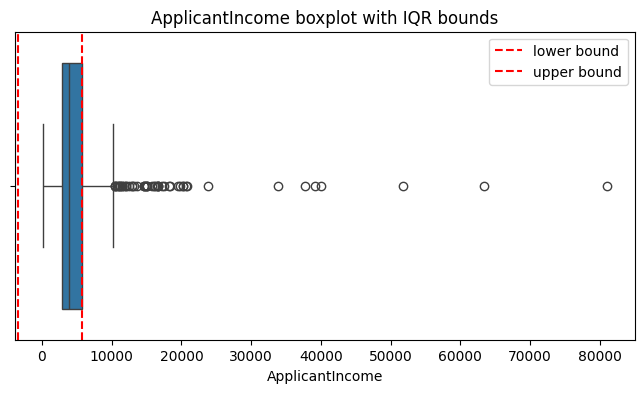

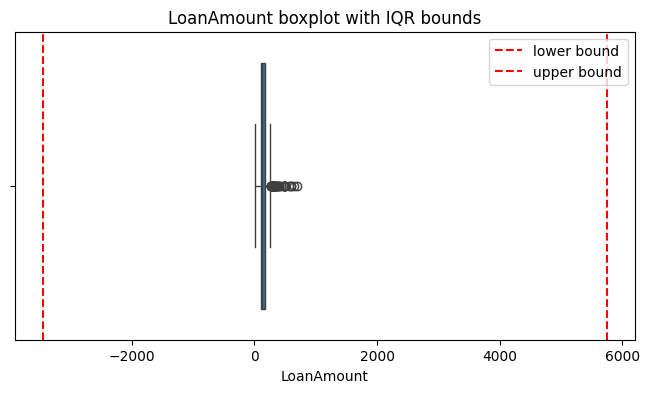

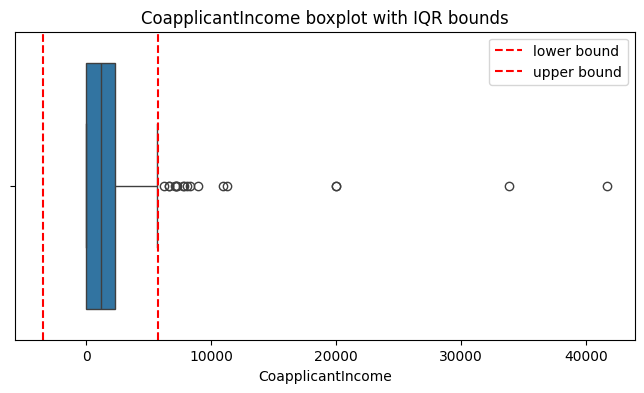

In [38]:
outlier_vis(outlier_col)

In [39]:
mask_outliers = (df2['ApplicantIncome'] > upper_bound) | (df2['ApplicantIncome'] < lower_bound).sum()
mask_outliers.sum()
# # Rows that are outliers
# outliers_df = df2[mask_outliers].copy()

# # Summary
# n_outliers = outliers_df.shape[0]
# n_total = df2.shape[0]
# print(f"Outliers found: {n_outliers} / {n_total} ({n_outliers / n_total * 100:.2f}%)")
# outliers_df.head(10)   # show first 10 outlier rows

np.int64(157)

### Handle oulier

In [29]:
for col in outlier_col:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    df3[col] = np.where(df3[col] < lower, lower,
                     np.where(df3[col] > upper, upper, df3[col]))

In [30]:
iqr_out_counts_new = {}
for col in outlier_col:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_out_counts_new[col] = ((df3[col] < lower) | (df3[col] > upper)).sum()

iqr_out_counts_new = pd.Series(iqr_out_counts_new)
print("\nOutlier counts by column AFTER capping (IQR rule):")
print(iqr_out_counts_new[iqr_out_counts_new > 0] if iqr_out_counts_new.sum() > 0 else "No IQR outliers detected")


Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [42]:
if 'iqr_out_counts' in globals():
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    print("\nComparison of IQR outlier counts (before vs after capping):")
    display(compare_iqr)
else:
    print("No previous IQR outlier counts found.")

No previous IQR outlier counts found.


In [43]:
df3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,4617.111564,2479.851729,150.0,2877.5,3812.5,5795.0,10171.25
CoapplicantIncome,614.0,NaN,NaN,NaN,1419.702231,1624.605892,0.0,0.0,1188.5,2297.25,5743.125
LoanAmount,614.0,NaN,NaN,NaN,137.365635,55.779749,9.0,100.25,128.0,164.75,261.5
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0


In [44]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df3['ApplicantIncome'].between(lower_bound, upper_bound).all()

np.False_

### Univariate Numerical EDA

In [38]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


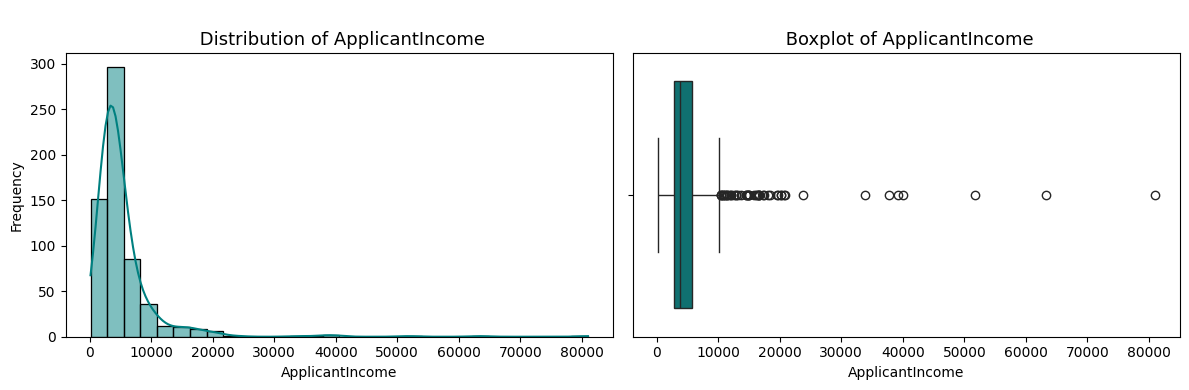


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [40]:
univariate_numerical_eda(df, 'ApplicantIncome')

 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


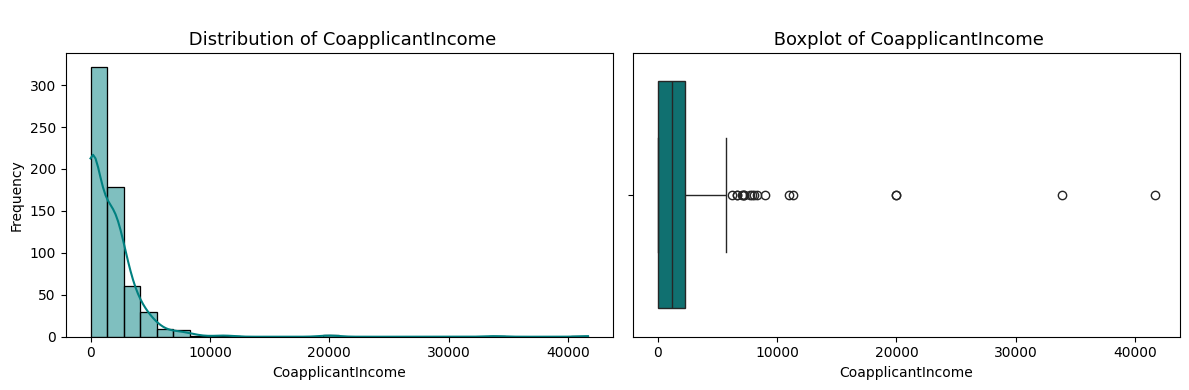


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [39]:
univariate_numerical_eda(df, 'CoapplicantIncome')

 Feature: LoanAmount
       LoanAmount
count  592.000000
mean   146.412162
std     85.587325
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    700.000000

Skewness: 2.678
Kurtosis: 10.402


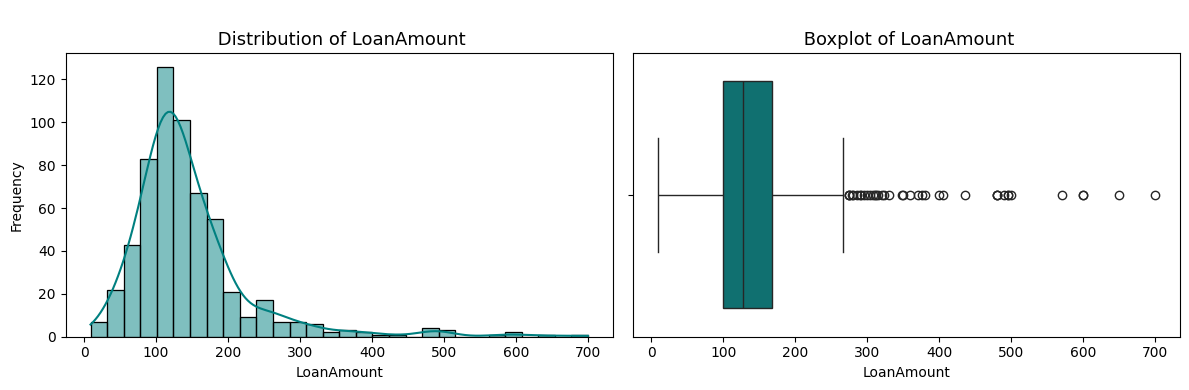


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.


In [42]:
univariate_numerical_eda(df, 'LoanAmount')

 Feature: Credit_History
       Credit_History
count      564.000000
mean         0.842199
std          0.364878
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -1.882
Kurtosis: 1.549


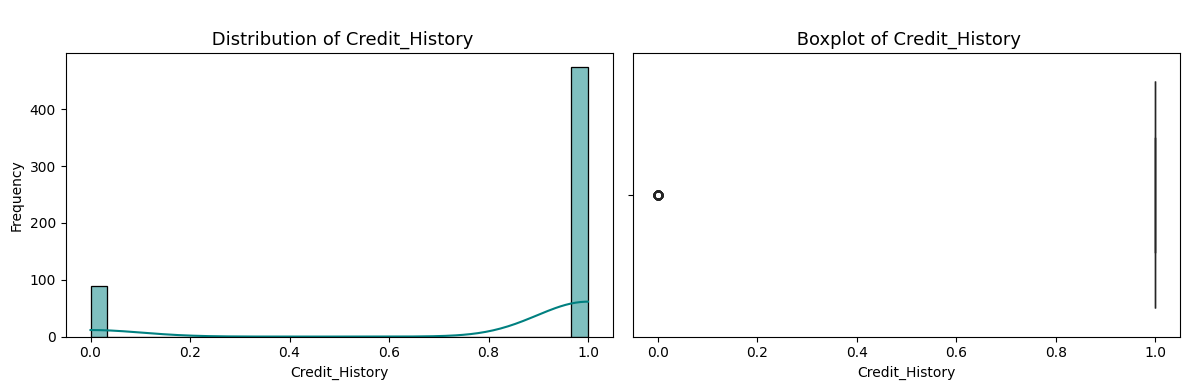


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [44]:
univariate_numerical_eda(df, 'Credit_History')

In [49]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
cat_cols = [ 'Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24

         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69

            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31

               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36

                Count  Percentage
Credit_History                   
1.0               525        85.5
0.0                89        14.5

               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15

             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\2128735529.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=ax_bar)
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\2128735529.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=ax_bar)
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_24908\2128735529.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=

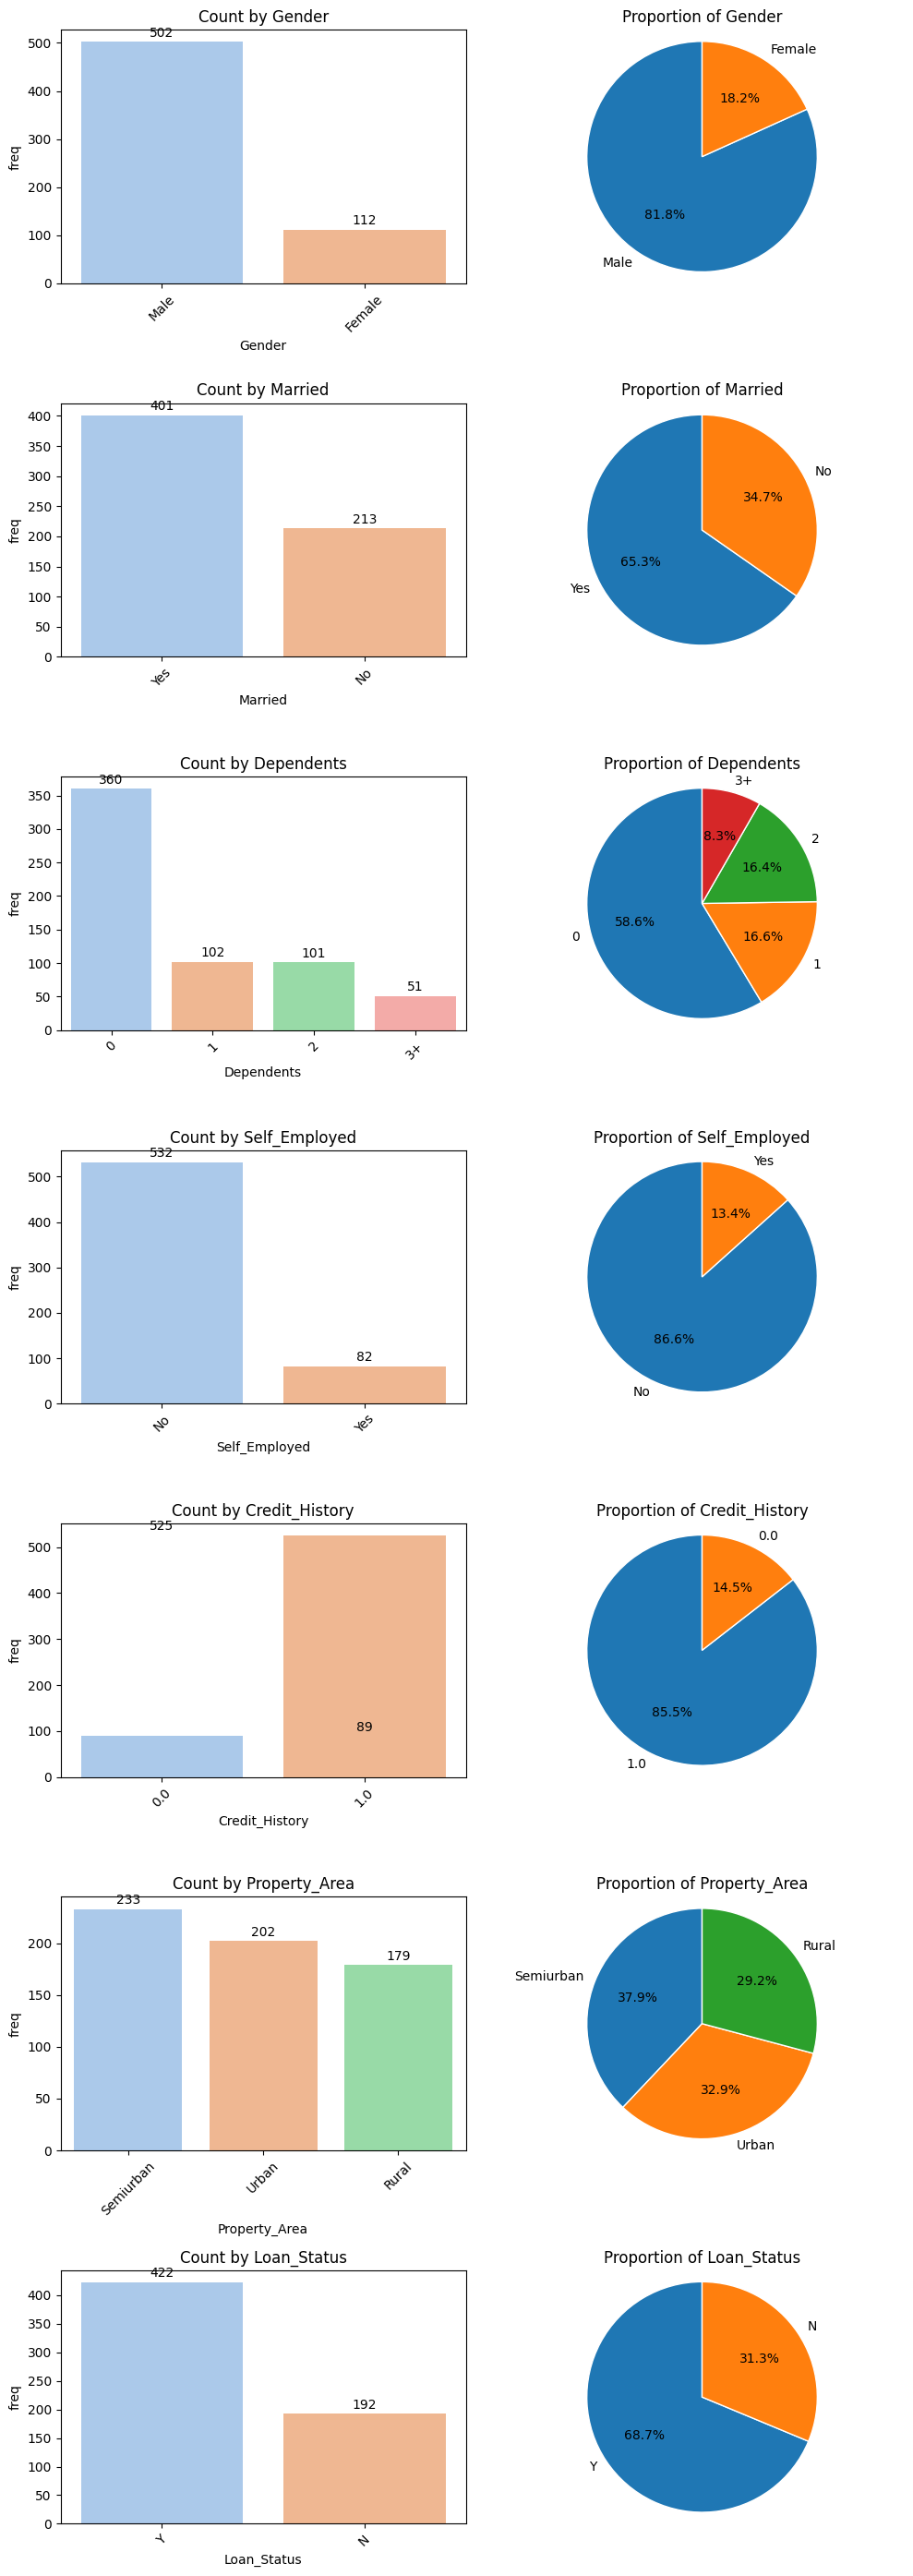

In [53]:
n = len(cat_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 4 * n))

# ensure axes is 2D for consistent indexing when n == 1
if n == 1:
    axes = np.array([axes])

for i, col in enumerate(cat_cols):
    counts = df3[col].value_counts()
    freq = df3[col].value_counts()
    prop = df3[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Bar chart (left)
    ax_bar = axes[i, 0]
    sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=ax_bar)
    ax_bar.set_title(f'Count by {col}')
    ax_bar.set_xlabel(col)
    ax_bar.set_ylabel('freq')
    ax_bar.tick_params(axis='x', rotation=45)


    # annotate bar values
    for j, v in enumerate(counts.values):
        ax_bar.text(j, v + max(counts.values) * 0.01, str(v), ha='center', va='bottom', fontsize=10)

    # Pie chart (right)
    ax_pie = axes[i, 1]
    ax_pie.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='w'))
    ax_pie.set_title(f'Proportion of {col}')
    ax_pie.axis('equal')

plt.tight_layout()
plt.show()

In [49]:
df['Loan_Status'] = df['Loan_Status'].replace({"Y": 1, "N" : 0})
num_features = df.select_dtypes(include=['int64', 'float64']).columns

### Bivariate Analysis

In [55]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [45]:

def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

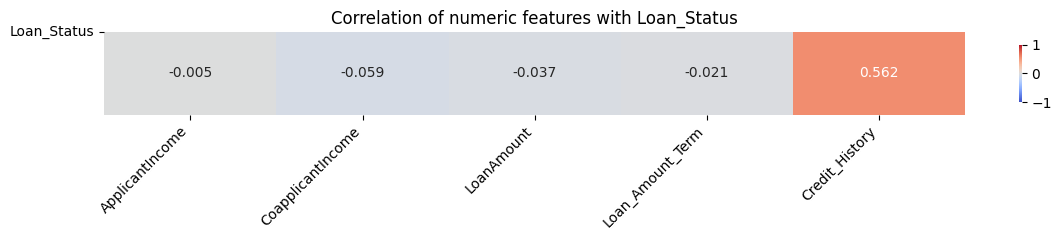

Credit_History       0.561678
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
ApplicantIncome     -0.004710
dtype: float64

In [53]:
correlation_with_target (df, 'Loan_Status', figsize=(12,2.5))



In [ ]:
###checking correlation
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):


    corr, p_value = pearsonr(df[x_col], df[y_col])
    print(f"Pearson correlation between '{x_col}' and '{y_col}': {corr:.3f}")
    print(f"P-value: {p_value:.3f}\n")
    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

Pearson correlation between 'ApplicantIncome' and 'LoanAmount': 0.558
P-value: 0.000



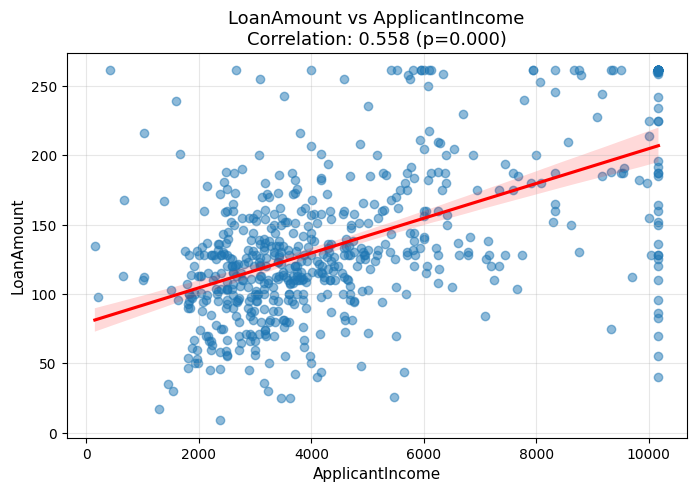

In [56]:
numeric_bivariate_plot(df3, 'ApplicantIncome', 'LoanAmount')

Pearson correlation between 'CoapplicantIncome' and 'LoanAmount': 0.266
P-value: 0.000



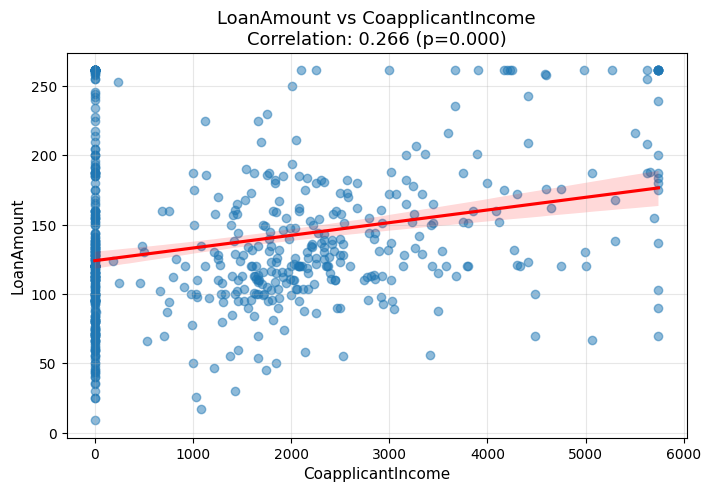

In [ ]:
numeric_bivariate_plot(df3, 'CoapplicantIncome', 'LoanAmount')

Pearson correlation between 'CoapplicantIncome' and 'ApplicantIncome': -0.229
P-value: 0.000



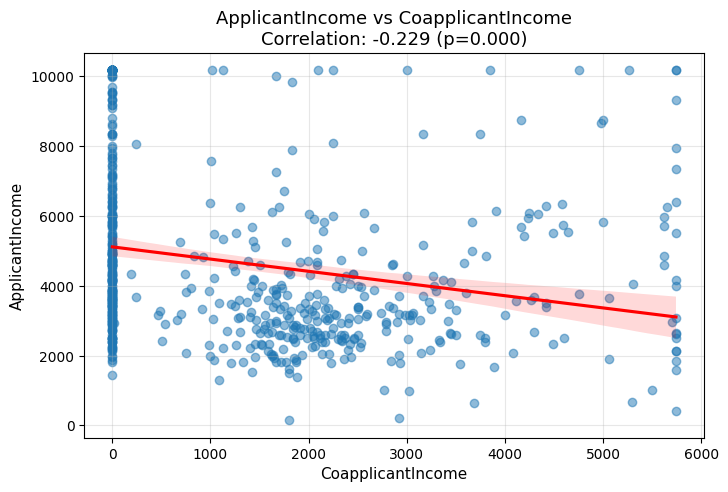

In [57]:
numeric_bivariate_plot(df3, 'CoapplicantIncome', 'ApplicantIncome')

Pearson correlation between 'Credit_History' and 'ApplicantIncome': 0.035
P-value: 0.382



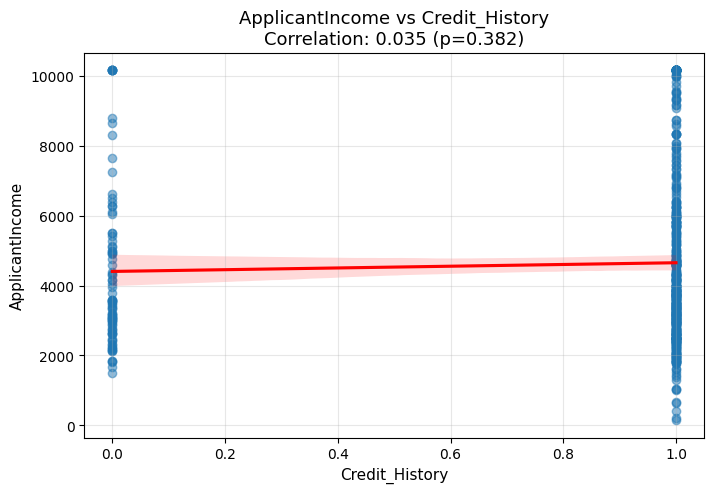

In [58]:
numeric_bivariate_plot(df3, 'Credit_History', 'ApplicantIncome')



In [ ]:
### NUmerica and Categorical

In [ ]:
def bivariate_num_cat(df3, feature, target):
   
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    # Violin plot for distribution shape
    plt.figure(figsize=(10,5))
    sns.violinplot(x=target, y=feature, data=df, palette='Set3')
    plt.title(f'{feature} distribution by {target}', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()


 Feature: ApplicantIncome vs Loan_Status
                    mean          std    min      max
Loan_Status                                          
N            4618.713542  2509.846714  150.0  10171.0
Y            4616.353081  2469.015922  210.0  10171.0

                    mean          std    min      max
Loan_Status                                          
N            4618.713542  2509.846714  150.0  10171.0
Y            4616.353081  2469.015922  210.0  10171.0



C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


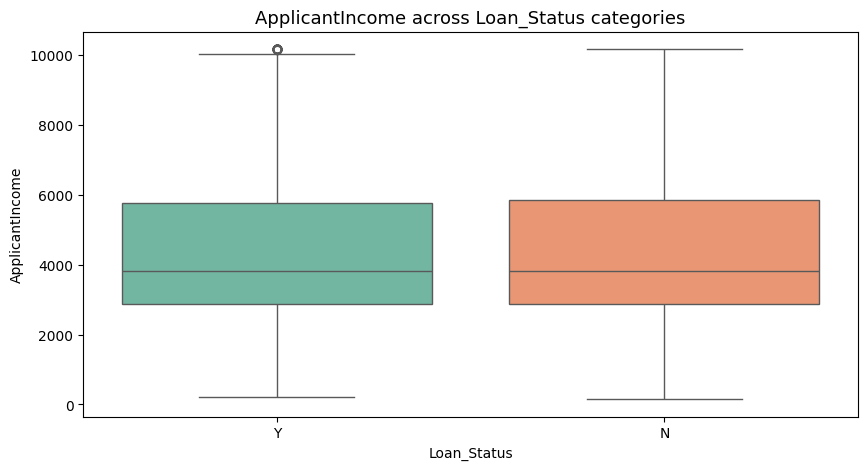

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


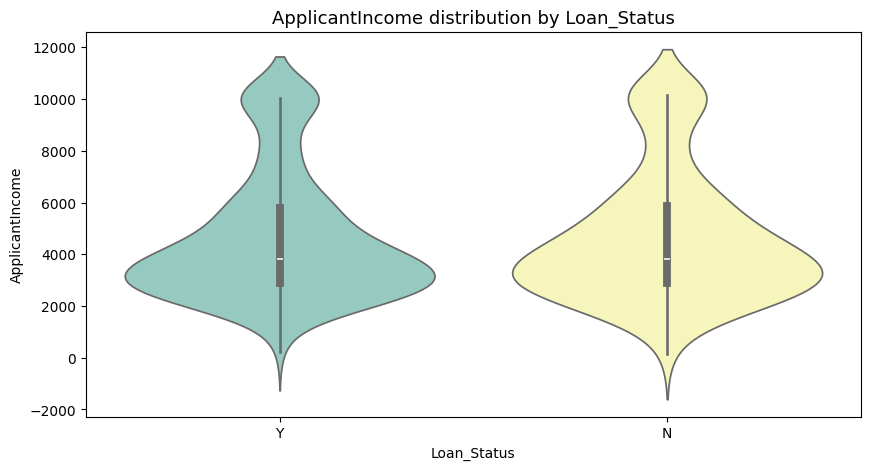

In [ ]:
bivariate_num_cat(df3, 'ApplicantIncome', 'Loan_Status' )

 Feature: CoapplicantIncome vs Loan_Status
                    mean          std  min       max
Loan_Status                                         
N            1390.864583  1703.635671  0.0  5743.125
Y            1432.822678  1589.254456  0.0  5743.125

                    mean          std  min       max
Loan_Status                                         
N            1390.864583  1703.635671  0.0  5743.125
Y            1432.822678  1589.254456  0.0  5743.125



C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


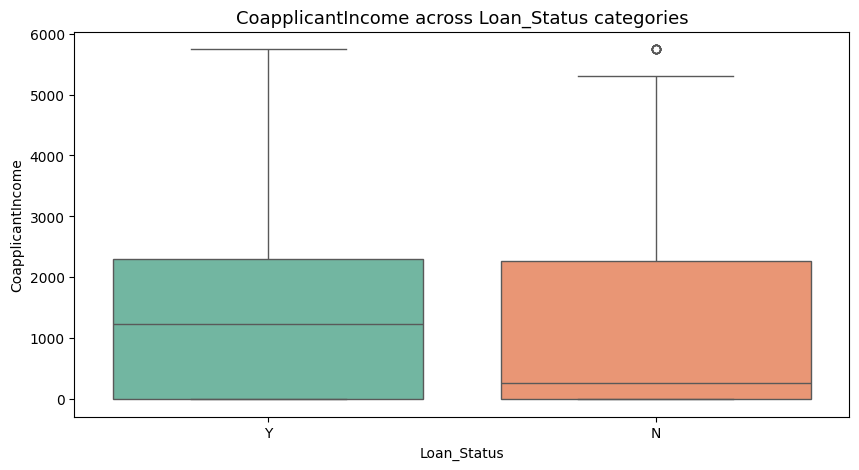

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


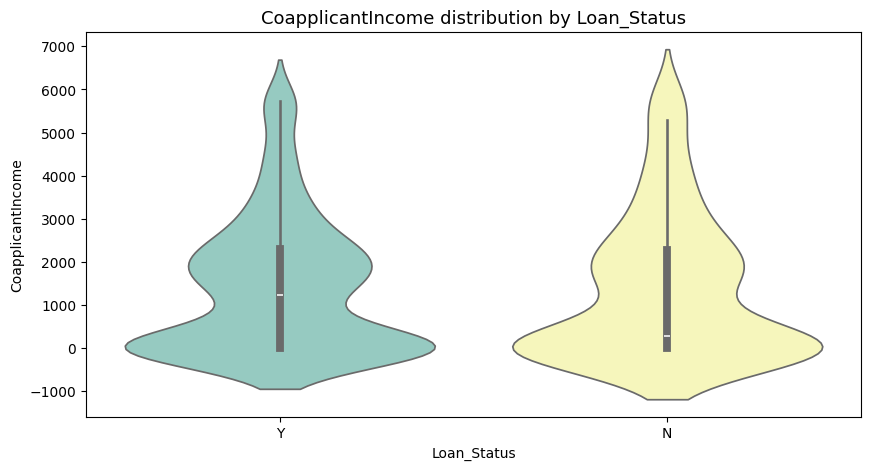

In [ ]:
bivariate_num_cat(df3, 'CoapplicantIncome', 'Loan_Status' )

 Feature: LoanAmount vs Loan_Status
                   mean        std   min    max
Loan_Status                                    
N            140.812500  58.240576   9.0  261.5
Y            135.380332  54.710884  17.0  261.5



C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


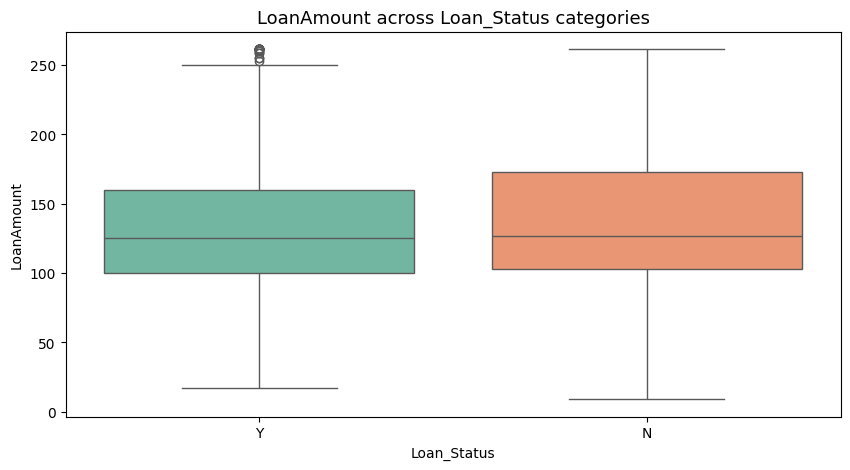

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


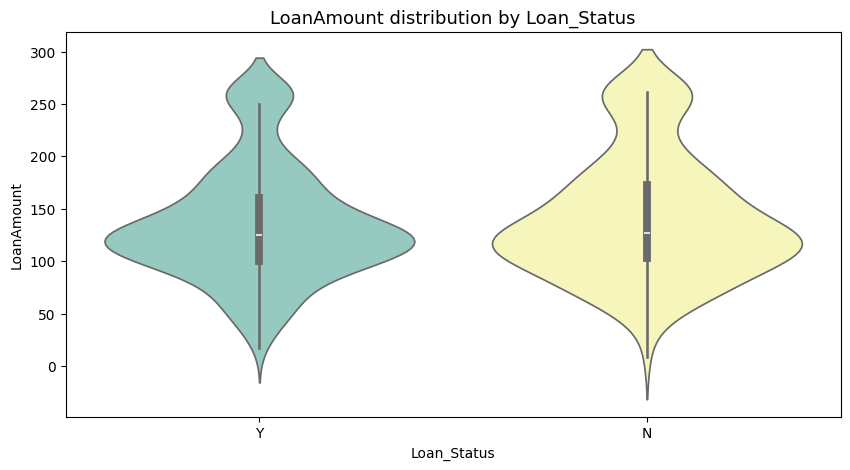

In [ ]:

bivariate_num_cat(df3, 'LoanAmount', 'Loan_Status' )

 Feature: Credit_History vs Loan_Status
                 mean       std  min  max
Loan_Status                              
N            0.572917  0.495948  0.0  1.0
Y            0.983412  0.127872  0.0  1.0



C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


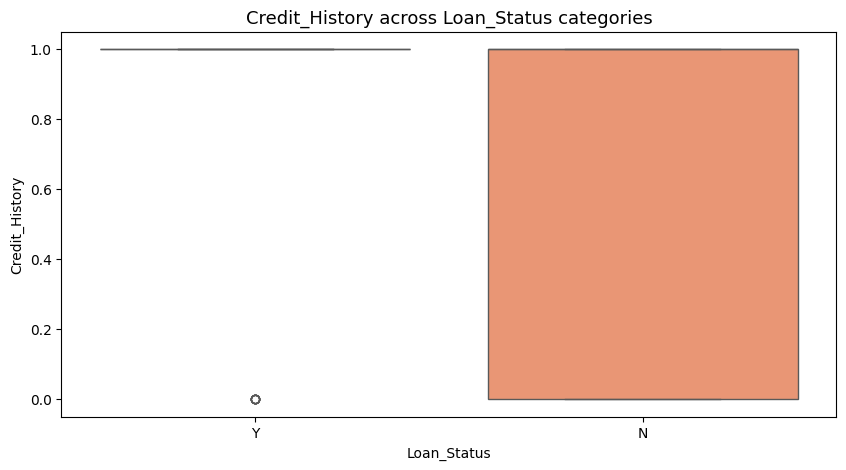

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\2430344895.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


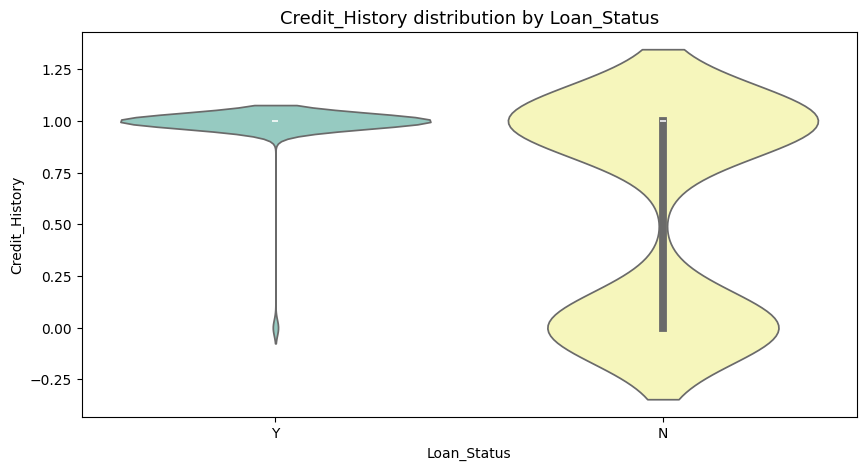

In [ ]:
bivariate_num_cat(df3, 'Credit_History', 'Loan_Status' )

In [ ]:
# lets apply our function using loops
# for col in num_features:
#     bivariate_num_cat(df3, col, 'Loanstatus')

In [ ]:
df3.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Trivariate analysis

In [55]:
def trivariate_plot(df, x_col, y_col, hue_col):
   
    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


<Figure size 800x600 with 0 Axes>

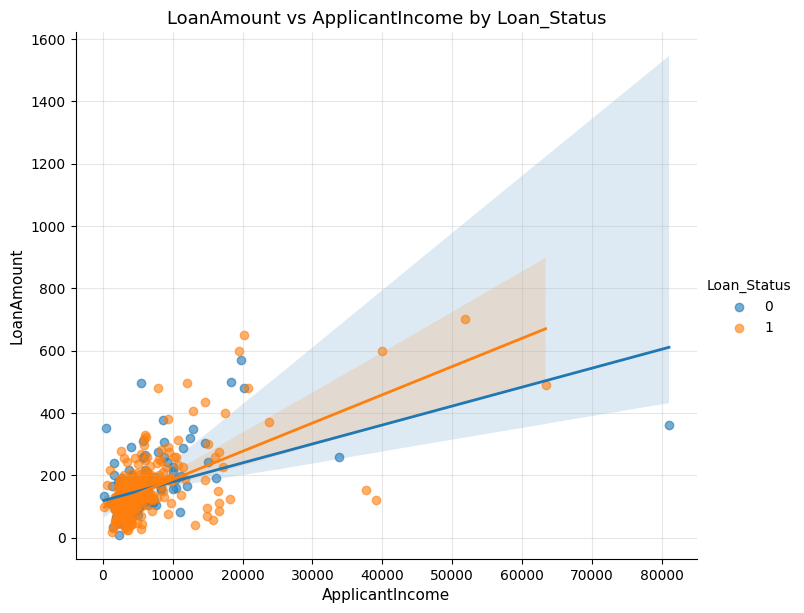

In [57]:
##comparing the most important features with the targets

trivariate_plot(df,'ApplicantIncome','LoanAmount','Loan_Status' )

**Axes**

**X-axis (alcohol)**: Represents the percentage of Applicantincome in the wine.

**Y-axis Loan amounts.

**Trend**

The Upward slope of the regression lines for all quality categories (Low, Medium, High) shows a possitive correlation between Applicantincome and Loan amount

This means that as  increases,  tends to decrease.

<Figure size 800x600 with 0 Axes>

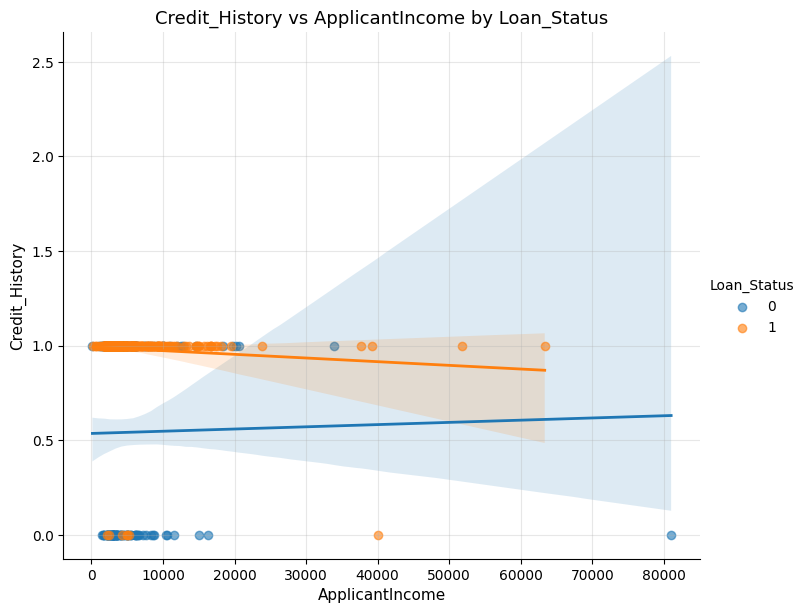

In [58]:
trivariate_plot(df,'ApplicantIncome','Credit_History','Loan_Status' )

In [54]:
trivariate_plot(df,'ApplicantIncome','CoapplicantIncome','Loan_Status' )

NameError: name 'trivariate_plot' is not defined

In [66]:
df3.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
Num_m= df3[['ApplicantIncome','LoanAmount','CoapplicantIncome']]


In [ ]:
### Multivariate Analysis

def grouped_summary(df3):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df3.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary

In [ ]:
grouped_summary(df3)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,4618.71,1390.86,140.81,344.56,0.57
Y,4616.35,1432.82,135.38,341.43,0.98


In [317]:
df3['Loan_SN']= df3['Loan_Status'].map({'Y': 1,'N': 0})

In [318]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_SN
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,1


### DATA PREPROCESSING

In [329]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df5[col] = le.fit_transform(df5[col])
    # df6[col] = le.fit_transform(df6[col])

In [ ]:
sampling= SMOTE()
x,y= sampling.fit_resample(x, y)
x['Loan']= y
return x

In [282]:

from sklearn.tree import DecisionTreeClassifier

Dc_model = DecisionTreeClassifier(random_state=42)
Dc_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [309]:
y_pred_Dc= Dc_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_Dc))
print("Balanced accuracy:",balanced_accuracy_score(y_test, y_pred_Dc) )
print("Classification Report:")
print(classification_report(y_test, y_pred_Dc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7804878048780488
Balanced accuracy: 0.7611455108359133
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        38
           1       0.86      0.81      0.84        85

    accuracy                           0.78       123
   macro avg       0.75      0.76      0.75       123
weighted avg       0.79      0.78      0.78       123

Confusion Matrix:
[[27 11]
 [ 8 77]]


In [294]:
lr_model=  LogisticRegression(max_iter=100, random_state=42)

lr_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [297]:
y_pred_lr= lr_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Balanced accuracy:",balanced_accuracy_score(y_test, y_pred_lr) )
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6910569105691057
Balanced accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123

Confusion Matrix:
[[27 11]
 [ 8 77]]


c:\Users\Adenuga Pelumi\Documents\Complete AI course\Week11_Machine_learning\Back_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Adenuga Pelumi\Documents\Complete AI course\Week11_Machine_learning\Back_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Adenuga Pelumi\Documents\Complete AI course\Week11_Machine_learning\Back_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

In [259]:
knn_model = KNeighborsClassifier()


knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [286]:
y_pred_knn= knn_model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred_knn))
print("Classification Report")
print(classification_report(y_test, y_pred_knn))
print("confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy 0.6829268292682927
Classification Report
              precision    recall  f1-score   support

           0       0.48      0.34      0.40        38
           1       0.74      0.84      0.78        85

    accuracy                           0.68       123
   macro avg       0.61      0.59      0.59       123
weighted avg       0.66      0.68      0.67       123

confusion Matrix
[[13 25]
 [14 71]]


In [298]:
models = ['Random Forest','Decision Tree', 'Logistic Regression' ,'KNN']
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_Dc),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_knn),
             ]


model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)

                 Model  Accuracy
0        Random Forest  0.845528
1        Decision Tree  0.780488
2  Logistic Regression  0.691057
3                  KNN  0.682927


In [ ]:
df_copy = df3.copy()
encoder = OrdinalEncoder()
df_copy[object_columns] = encoder.fit_transform(df_copy[object_columns])
df_copy[object_columns]

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,1.0,2.0
1,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,2.0
3,1.0,1.0,0.0,0.0,1.0,2.0
4,1.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,1.0,0.0
610,1.0,1.0,3.0,0.0,1.0,0.0
611,1.0,1.0,1.0,0.0,1.0,2.0
612,1.0,1.0,2.0,0.0,1.0,2.0


In [306]:
df_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_SN
0,LP001002,1.0,0.0,0.0,Graduate,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,Y,1
1,LP001003,1.0,1.0,1.0,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,N,0
2,LP001005,1.0,1.0,0.0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,Y,1
3,LP001006,1.0,1.0,0.0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,Y,1
4,LP001008,1.0,0.0,0.0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,Graduate,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,Y,1
610,LP002979,1.0,1.0,3.0,Graduate,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,Y,1
611,LP002983,1.0,1.0,1.0,Graduate,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,Y,1
612,LP002984,1.0,1.0,2.0,Graduate,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,Y,1
